# Tiempo promedio mejorado entre despachos


In [48]:
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para cálculos numéricos y manejo de arrays
import matplotlib.pyplot as plt  # Para visualización de datos

## Se realiza la carga del archivo con los datos filtrados

In [69]:
# Cargar el conjunto de datos desde un archivo CSV
# Asegúrate de reemplazar 'ruta_al_archivo.csv' con la ruta real de tu archivo
ruta_archivo = 'datos_filtrados.csv'
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar la carga
df.head()

,FECHA_INICIAL,HORA_INICIAL_PLAN,HORA_INICIAL_REAL,HORA_INICIAL_AUX,FECHA_FINAL,HORA_FINAL_PLAN,HORA_FINAL_REAL,HORA_FINAL_AUX,FK_RUTA,PASAJEROS,DISTANCIA,FK_VEHICULO,FK_CONDUCTOR,ESTADO_DESPACHO,PK_INTERVALO_DESPACHO,PK_INFORMACION_REGISTRADORA,DIA_SEMANA,DIFERENCIA_TIEMPO
0,2024-04-22,2024-04-22 04:50:00,2024-04-22 04:45:37,4:56:42,2024-04-22,2024-04-22 07:01:00,2024-04-22 06:30:07,6:30:07,6,30,31500,66,304,2,245820,348367,Monday,-4.383333
1,2024-04-22,2024-04-22 04:39:00,2024-04-22 04:36:44,4:36:44,2024-04-22,2024-04-22 07:20:00,2024-04-22 06:51:12,6:51:12,1,51,39200,45,29,2,245811,348370,Monday,-2.266667
2,2024-04-22,2024-04-22 05:00:00,2024-04-22 05:00:50,5:00:50,2024-04-22,2024-04-22 07:00:00,2024-04-22 06:52:32,6:52:32,5,44,31900,47,307,2,245821,348371,Monday,0.833333
3,2024-04-22,2024-04-22 04:44:00,2024-04-22 04:43:30,4:43:30,2024-04-22,2024-04-22 07:25:00,2024-04-22 07:01:56,7:01:56,1,57,39000,71,10,2,245813,348373,Monday,-0.500000
4,2024-04-22,2024-04-22 05:15:00,2024-04-22 05:15:16,5:15:16,2024-04-22,2024-04-22 07:15:00,2024-04-22 07:14:18,7:14:18,5,55,31400,33,329,3,245826,348375,Monday,0.266667


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53975 entries, 0 to 53974
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FECHA_INICIAL                53975 non-null  object 
 1   HORA_INICIAL_PLAN            53975 non-null  object 
 2   HORA_INICIAL_REAL            53975 non-null  object 
 3   HORA_INICIAL_AUX             53975 non-null  object 
 4   FECHA_FINAL                  53975 non-null  object 
 5   HORA_FINAL_PLAN              53975 non-null  object 
 6   HORA_FINAL_REAL              48031 non-null  object 
 7   HORA_FINAL_AUX               53975 non-null  object 
 8   FK_RUTA                      53975 non-null  int64  
 9   PASAJEROS                    53975 non-null  int64  
 10  DISTANCIA                    53975 non-null  int64  
 11  FK_VEHICULO                  53975 non-null  int64  
 12  FK_CONDUCTOR                 53975 non-null  int64  
 13  ESTADO_DESPACHO 

In [51]:
# Filtrar los registros donde 'HORA_INICIAL_REAL' sea nulo o vacío
valores_nulos = df[df['HORA_INICIAL_REAL'].isnull()]

# Mostrar los registros con valores nulos en 'HORA_INICIAL_REAL'
print(valores_nulos)

# Mostrar el número total de valores nulos en 'HORA_INICIAL_REAL'
print(f"Total de valores nulos en 'HORA_INICIAL_REAL': {valores_nulos.shape[0]}")

Empty DataFrame
Columns: [FECHA_INICIAL, HORA_INICIAL_PLAN, HORA_INICIAL_REAL, HORA_INICIAL_AUX, FECHA_FINAL, HORA_FINAL_PLAN, HORA_FINAL_REAL, HORA_FINAL_AUX, FK_RUTA, PASAJEROS, DISTANCIA, FK_VEHICULO, FK_CONDUCTOR, ESTADO_DESPACHO, PK_INTERVALO_DESPACHO, PK_INFORMACION_REGISTRADORA, DIA_SEMANA, DIFERENCIA_TIEMPO]
Index: []
Total de valores nulos en 'HORA_INICIAL_REAL': 0


## Por regla del negocio los vehiculos cque han sido planificados para despacho a muy tempranas horas de la mañana no salen del punto de origen, esto ocaciona que en la base de datos existan registros nulos o vacios en el campo HORA_INICIAL_REAL. Pero efectivamente los vehiculos estan prestando el servicio.
Por lo tanto aquellos datos nulos o vacios en este campo se reemplazan por los registros en el campo HORA_INICIAL_PLAN
A continuación se realiza el procedimiento.

In [52]:
# Verificar y convertir las columnas de tiempo solo si no están en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df['HORA_FINAL_PLAN']):
    df['HORA_FINAL_PLAN'] = pd.to_datetime(df['HORA_FINAL_PLAN'], errors='coerce')


if not pd.api.types.is_datetime64_any_dtype(df['HORA_FINAL_REAL']):
    df['HORA_FINAL_REAL'] = pd.to_datetime(df['HORA_FINAL_REAL'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df['HORA_INICIAL_PLAN']):
    df['HORA_INICIAL_PLAN'] = pd.to_datetime(df['HORA_INICIAL_PLAN'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df['HORA_INICIAL_REAL']):
    df['HORA_INICIAL_REAL'] = pd.to_datetime(df['HORA_INICIAL_REAL'], errors='coerce')

# Reemplazar los valores nulos en 'HORA_INICIAL_REAL' con los valores de 'HORA_INICIAL_PLAN'
df['HORA_INICIAL_REAL'] = df['HORA_INICIAL_REAL'].fillna(df['HORA_INICIAL_PLAN'])


# Verificar los cambios
print(df[['HORA_INICIAL_PLAN', 'HORA_FINAL_PLAN', 'HORA_INICIAL_REAL']].head())

    HORA_INICIAL_PLAN     HORA_FINAL_PLAN   HORA_INICIAL_REAL
0 2024-04-22 04:50:00 2024-04-22 07:01:00 2024-04-22 04:45:37
1 2024-04-22 04:39:00 2024-04-22 07:20:00 2024-04-22 04:36:44
2 2024-04-22 05:00:00 2024-04-22 07:00:00 2024-04-22 05:00:50
3 2024-04-22 04:44:00 2024-04-22 07:25:00 2024-04-22 04:43:30
4 2024-04-22 05:15:00 2024-04-22 07:15:00 2024-04-22 05:15:16


## Calculo de la frecuencia de despacho por ruta y por dia

In [53]:
# Asegúrate de que las columnas de tiempo estén en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df['FECHA_INICIAL']):
    df['FECHA_INICIAL'] = pd.to_datetime(df['FECHA_INICIAL'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df['HORA_INICIAL_REAL']):
    df['HORA_INICIAL_REAL'] = pd.to_datetime(df['HORA_INICIAL_REAL'], errors='coerce')

# Crear el nuevo campo 'F_DESPACHO'
def calcular_frecuencia_despacho(grupo):
    try:
        # Ordenar por fecha y hora para asegurar el cálculo correcto
        grupo = grupo.sort_values(by=['FECHA_INICIAL', 'HORA_INICIAL_REAL'])
        
        # Calcular la diferencia en minutos entre registros consecutivos
        grupo['F_DESPACHO'] = grupo['HORA_INICIAL_REAL'].diff().dt.total_seconds() / 60
        
        # Reemplazar el primer valor de cada día con 0 minutos
        grupo['DIF_FECHA'] = grupo['FECHA_INICIAL'].diff().dt.days.fillna(0)
        grupo.loc[grupo['DIF_FECHA'] != 0, 'F_DESPACHO'] = 0
        
        # Asegurar que no haya valores nulos en 'F_DESPACHO'
        grupo['F_DESPACHO'] = grupo['F_DESPACHO'].fillna(0)
        
        # Eliminar la columna auxiliar 'DIF_FECHA'
        grupo = grupo.drop(columns=['DIF_FECHA'])
        
    except Exception as e:
        # Imprimir el error y los valores problemáticos
        print("Error en el cálculo de frecuencia de despacho:")
        print(f"Grupo problemático (FK_RUTA): {grupo['FK_RUTA'].iloc[0] if not grupo.empty else 'Desconocido'}")
        print(f"Valores del grupo:\n{grupo[['FECHA_INICIAL', 'HORA_INICIAL_REAL']]}")
        print(f"Error: {e}")
        raise  # Volver a lanzar la excepción para depuración adicional
    
    return grupo

# Agrupar por 'FK_RUTA' y aplicar la función
df = df.groupby('FK_RUTA', group_keys=False).apply(calcular_frecuencia_despacho)

# Exportar el DataFrame a un archivo CSV
df.to_csv('datos_pasajeros_filtrado_con_frecuencia.csv', index=False)

# Verificar los resultados
print(df[['FK_RUTA', 'FECHA_INICIAL', 'HORA_INICIAL_REAL', 'F_DESPACHO']].head())

C:\Users\regis\AppData\Local\Temp\ipykernel_25320\550021721.py:38: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



      FK_RUTA FECHA_INICIAL   HORA_INICIAL_REAL  F_DESPACHO
7890        1    2024-04-16 2024-04-16 04:38:24    0.000000
7891        1    2024-04-16 2024-04-16 04:44:35    6.183333
7892        1    2024-04-16 2024-04-16 04:49:51    5.266667
7893        1    2024-04-16 2024-04-16 04:56:18    6.450000
7894        1    2024-04-16 2024-04-16 05:03:01    6.716667


In [54]:
# Asegúrate de que la columna 'DIA_SEMANA' esté correctamente configurada
df['DIA_SEMANA'] = pd.to_datetime(df['FECHA_INICIAL']).dt.day_name()

# Calcular la cantidad de despachos por día de la semana y por ruta
despachos_por_dia_ruta = df.groupby(['DIA_SEMANA', 'FK_RUTA']).size().reset_index(name='CANTIDAD_DESPACHOS')

# Ordenar los resultados por día de la semana y ruta
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
despachos_por_dia_ruta['DIA_SEMANA'] = pd.Categorical(despachos_por_dia_ruta['DIA_SEMANA'], categories=dias_ordenados, ordered=True)
despachos_por_dia_ruta = despachos_por_dia_ruta.sort_values(by=['DIA_SEMANA', 'FK_RUTA'])

# Mostrar los resultados
print(despachos_por_dia_ruta)

# Opcional: Exportar los resultados a un archivo CSV
despachos_por_dia_ruta.to_csv('despachos_por_dia_ruta.csv', index=False)

   DIA_SEMANA  FK_RUTA  CANTIDAD_DESPACHOS
4      Monday        1                3844
5      Monday        3                3849
6      Monday        5                  80
7      Monday        6                 114
20    Tuesday        1                4596
21    Tuesday        3                4508
22    Tuesday        5                 100
23    Tuesday        6                 123
24  Wednesday        1                4276
25  Wednesday        3                4213
26  Wednesday        5                  96
27  Wednesday        6                 122
16   Thursday        1                4517
17   Thursday        3                4474
18   Thursday        5                  99
19   Thursday        6                 136
0      Friday        1                4566
1      Friday        3                4535
2      Friday        5                 103
3      Friday        6                 138
8    Saturday        1                3406
9    Saturday        3                3525
10   Saturd

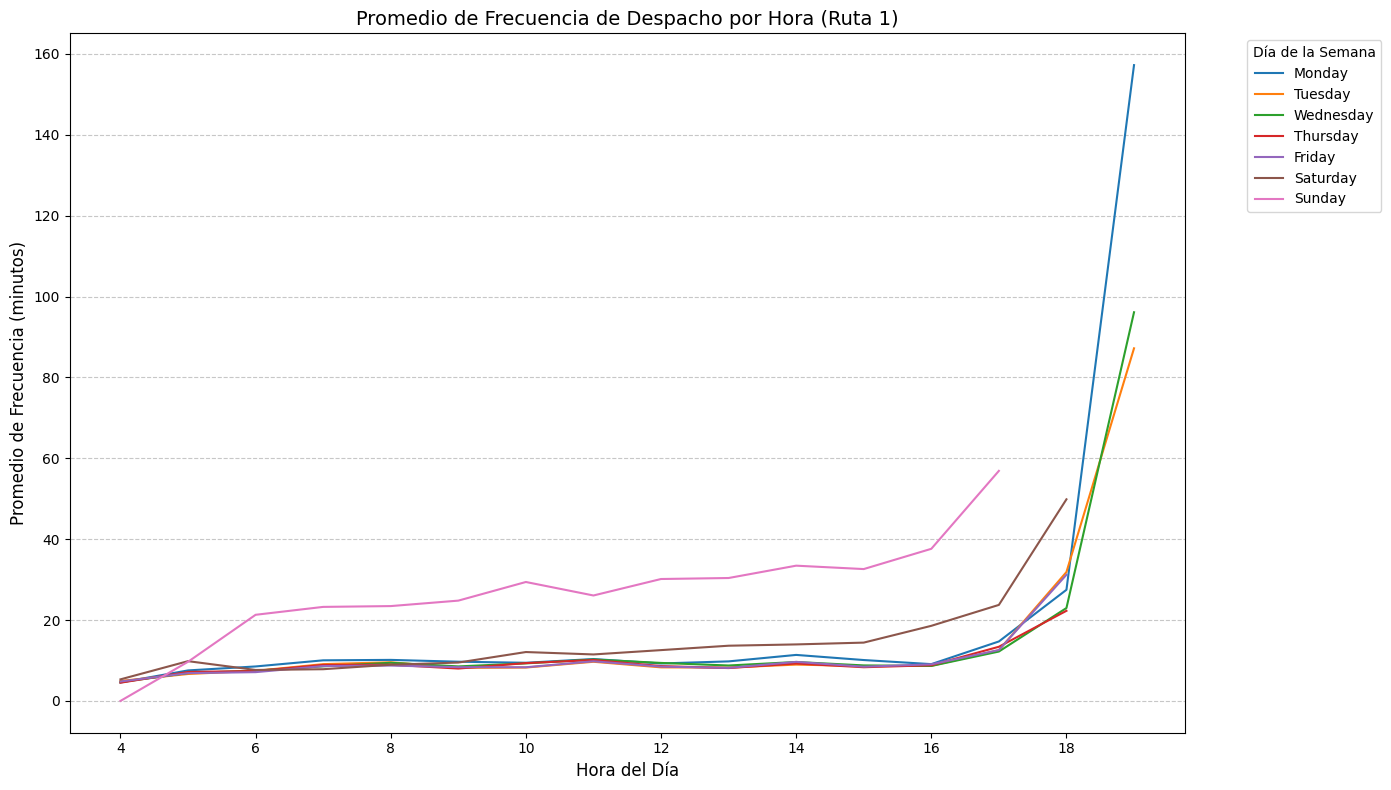

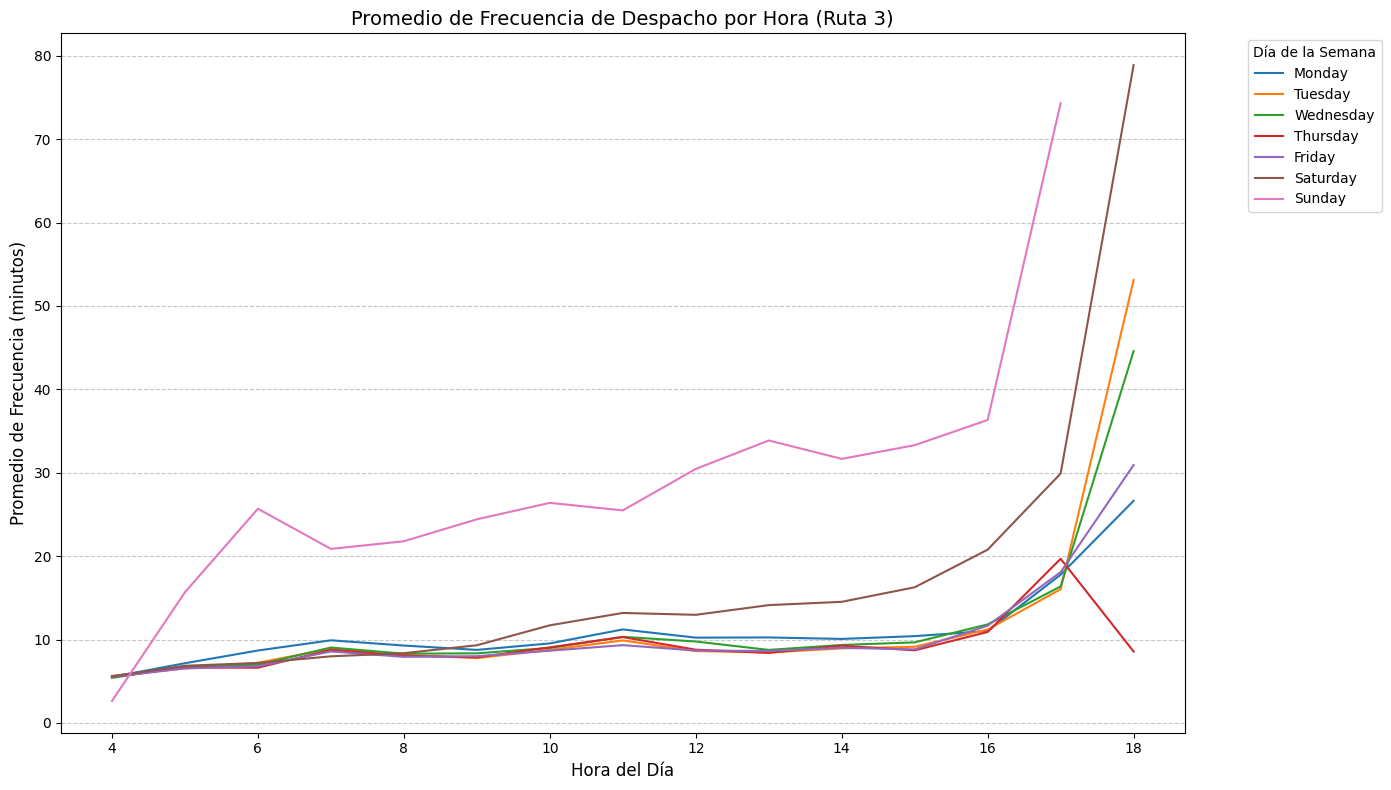

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'HORA_INICIAL_REAL' esté en formato datetime
df['HORA_INICIAL_REAL'] = pd.to_datetime(df['HORA_INICIAL_REAL'], errors='coerce')

# Crear una nueva columna para la hora (sin minutos ni segundos)
df['HORA'] = df['HORA_INICIAL_REAL'].dt.hour

# Calcular el promedio de la frecuencia de despacho por hora, día de la semana y ruta
promedio_frecuencia = (
    df.groupby(['DIA_SEMANA', 'FK_RUTA', 'HORA'])['F_DESPACHO']
    .mean()
    .reset_index(name='PROMEDIO_FRECUENCIA')
)

# Filtrar solo las rutas con FK_RUTA 1 y 3
rutas_filtradas = [1, 3]
promedio_frecuencia = promedio_frecuencia[promedio_frecuencia['FK_RUTA'].isin(rutas_filtradas)]

# Ordenar los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
promedio_frecuencia['DIA_SEMANA'] = pd.Categorical(promedio_frecuencia['DIA_SEMANA'], categories=dias_ordenados, ordered=True)

# Crear gráficos independientes por ruta
for ruta in rutas_filtradas:
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=promedio_frecuencia[promedio_frecuencia['FK_RUTA'] == ruta],
        x='HORA',
        y='PROMEDIO_FRECUENCIA',
        hue='DIA_SEMANA',
        markers=True,
        dashes=False,
        palette='tab10'
    )
    
    # Configurar el gráfico
    plt.title(f'Promedio de Frecuencia de Despacho por Hora (Ruta {ruta})', fontsize=14)
    plt.xlabel('Hora del Día', fontsize=12)
    plt.ylabel('Promedio de Frecuencia (minutos)', fontsize=12)
    plt.legend(title='Día de la Semana', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

In [56]:
import plotly.express as px

# Crear un DataFrame filtrado para las rutas 1 y 3
rutas_filtradas = [1, 3]
promedio_frecuencia = promedio_frecuencia[promedio_frecuencia['FK_RUTA'].isin(rutas_filtradas)]

# Crear un gráfico interactivo con Plotly
fig = px.line(
    promedio_frecuencia,
    x='HORA',
    y='PROMEDIO_FRECUENCIA',
    color='DIA_SEMANA',
    facet_col='FK_RUTA',  # Crear gráficos separados por ruta
    title='Promedio de Frecuencia de Despacho por Hora (Rutas 1 y 3)',
    labels={'HORA': 'Hora del Día', 'PROMEDIO_FRECUENCIA': 'Promedio de Frecuencia (minutos)', 'DIA_SEMANA': 'Día de la Semana'},
    markers=True
)

# Configurar el diseño
fig.update_layout(
    legend_title_text='Día de la Semana',
    xaxis=dict(tickmode='linear'),
    hovermode='x unified'
)

# Mostrar el gráfico interactivo
fig.show()

Observaciones técnicas clave
Frecuencias muy altas al final del día (17–19h): Explicado por el hecho de que los conductores se van a sus casas lo que baja la disponibilidad de vehiculos

Hasta 160 min en algunos días.

Se comprueba la desorganización, saturación o abandono de ruta.

Altísima variabilidad entre días:

Domingo y viernes tienen frecuencias muy distintas del resto.

Esto afecta la confiabilidad del servicio.

Estabilidad aceptable entre 5:00 y 13:00 aprox., pero no óptima:

Aunque hay consistencia, la frecuencia supera los 10–15 min en algunos tramos.

Ruta 3 parece más homogénea que Ruta 1, pero ambas tienen problemas después de las 16h.

In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53975 entries, 7890 to 17180
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   FECHA_INICIAL                53975 non-null  datetime64[ns]
 1   HORA_INICIAL_PLAN            53975 non-null  datetime64[ns]
 2   HORA_INICIAL_REAL            53975 non-null  datetime64[ns]
 3   HORA_INICIAL_AUX             53975 non-null  object        
 4   FECHA_FINAL                  53975 non-null  object        
 5   HORA_FINAL_PLAN              53975 non-null  datetime64[ns]
 6   HORA_FINAL_REAL              48031 non-null  datetime64[ns]
 7   HORA_FINAL_AUX               53975 non-null  object        
 8   FK_RUTA                      53975 non-null  int64         
 9   PASAJEROS                    53975 non-null  int64         
 10  DISTANCIA                    53975 non-null  int64         
 11  FK_VEHICULO                  53975 non-null

## Calculo de KPI 'Mejora en los tiempos de despacho'

In [63]:
# Definir las rutas que deseas incluir
rutas_filtradas = [1, 3]

# Filtrar el DataFrame por las rutas deseadas
df_filtrado = df[df['FK_RUTA'].isin(rutas_filtradas)].copy()
df['MES'] = df['FECHA_INICIAL'].dt.to_period('M')  


In [65]:
df_promedios = df_filtrado.groupby(['MES', 'FK_RUTA', 'HORA'])['F_DESPACHO'].mean().reset_index()


In [66]:
# Ordenar por mes para asegurar el orden cronológico
df_promedios.sort_values(by=['FK_RUTA', 'HORA', 'MES'], inplace=True)

# Usar shift para obtener la frecuencia del mes anterior
df_promedios['F_ANTERIOR'] = df_promedios.groupby(['FK_RUTA', 'HORA'])['F_DESPACHO'].shift(1)

# Calcular mejora: positivo es mejora (menor tiempo entre despachos)
df_promedios['MEJORA_FRECUENCIA'] = df_promedios['F_ANTERIOR'] - df_promedios['F_DESPACHO']


In [67]:
kpi_mensual = df_promedios.groupby(['MES', 'FK_RUTA'])['MEJORA_FRECUENCIA'].mean().reset_index()

kpi_mensual

,MES,FK_RUTA,MEJORA_FRECUENCIA
0,2024-04,1,NaN
1,2024-04,3,NaN
2,2024-05,1,1.574091
3,2024-05,3,-0.236936
4,2024-06,1,2.425575
5,2024-06,3,-5.181113
6,2024-07,1,0.713457
7,2024-07,3,4.404718
8,2024-08,1,0.169379
9,2024-08,3,-0.145661


In [68]:
import plotly.express as px
import plotly.graph_objects as go

# Asegurar que la columna MES esté en formato datetime
df_kpi = kpi_mensual.copy()
df_kpi['MES'] = pd.to_datetime(df_kpi['MES'].astype(str))

# Crear gráfico con líneas y marcadores por ruta
fig = px.line(
    df_kpi,
    x='MES',
    y='MEJORA_FRECUENCIA',
    color='FK_RUTA',
    markers=True,
    title='KPI: Mejora de Tiempo Promedio entre Despachos (por Mes y Ruta)',
    labels={
        'MES': 'Mes',
        'MEJORA_FRECUENCIA': 'Mejora de Frecuencia (minutos)',
        'FK_RUTA': 'Ruta'
    }
)

# Línea base horizontal en y=0 (sin mejora)
fig.add_hline(
    y=0,
    line_dash="dash",
    line_color="gray",
    annotation_text="Sin Mejora",
    annotation_position="top left"
)

# Estilo del gráfico
fig.update_layout(
    xaxis=dict(
        title="Mes",
        tickformat="%b %Y"
    ),
    yaxis_title="Mejora de Frecuencia (minutos)",
    hovermode="x unified",
    template="plotly_white",
    legend_title_text="Ruta"
)

fig.show()


Valores por encima de 0: indican que la frecuencia de despacho mejoró (se redujo el tiempo entre despachos).

Valores por debajo de 0: indican que la frecuencia empeoró respecto al mes anterior.

En junio 2024, la Ruta 3 presenta un gran empeoramiento de casi -5 minutos.

En julio 2024, hay una fuerte mejora para la Ruta 3, lo cual puede indicar algún cambio operativo positivo.

Para la Ruta 1, se observa una mejora sostenida entre mayo y julio, pero cierta inestabilidad posterior.

En febrero 2025, ambas rutas muestran mejora, especialmente la Ruta 3.

